In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import glob
import seaborn as sns
plt.style.use('fivethirtyeight')

In [5]:
#Read all sales files using glob
folder_path = '/Users/sageevarug/Downloads/python-projects/Pandas-Data-Science-Tasks/SalesAnalysis/Sales_Data'
file_list = glob.glob(folder_path + "/*.csv")

df = pd.concat((pd.read_csv(f) for f in file_list))
print(df.head())

  Order ID               Product Quantity Ordered Price Each      Order Date  \
0   295665    Macbook Pro Laptop                1       1700  12/30/19 00:01   
1   295666    LG Washing Machine                1      600.0  12/29/19 07:03   
2   295667  USB-C Charging Cable                1      11.95  12/12/19 18:21   
3   295668      27in FHD Monitor                1     149.99  12/22/19 15:13   
4   295669  USB-C Charging Cable                1      11.95  12/18/19 12:38   

                         Purchase Address  
0  136 Church St, New York City, NY 10001  
1     562 2nd St, New York City, NY 10001  
2    277 Main St, New York City, NY 10001  
3     410 6th St, San Francisco, CA 94016  
4           43 Hill St, Atlanta, GA 30301  


Initial preprocessing

In [6]:
df.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
dtype: object

In [12]:
df['Quantity Ordered'] = pd.to_numeric(df['Quantity Ordered']) #better than using astype('x')
df['Price Each'] = pd.to_numeric(df['Price Each'])

Imputation

In [8]:
#Remove rows where val is null
print("Size of df before = ", len(df))
df.dropna(inplace=True)
print("Size of df after = ", len(df))

Size of df before =  186850
Size of df after =  186305


In [9]:
df.isnull().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

Remove string values from columns

In [11]:
df = df[df['Order Date'].str[0:2] != 'Or']
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001"
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001"
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001"
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016"
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301"


Augment data with additional cols

In [13]:
df.columns

Index(['Order ID', 'Product', 'Quantity Ordered', 'Price Each', 'Order Date',
       'Purchase Address'],
      dtype='object')

In [14]:
df['Month'] = df['Order Date'].str[0:2].astype('int')

In [15]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,295665,Macbook Pro Laptop,1,1700.00,12/30/19 00:01,"136 Church St, New York City, NY 10001",12
1,295666,LG Washing Machine,1,600.00,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12


In [16]:
df['Sales'] = df['Quantity Ordered']  * df['Price Each']
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,295665,Macbook Pro Laptop,1,1700.00,12/30/19 00:01,"136 Church St, New York City, NY 10001",12,1700.00
1,295666,LG Washing Machine,1,600.00,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12,600.00
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12,11.95
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12,149.99
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12,11.95


In [55]:
#df['City'] = df['Purchase Address'].str.split(',').str[1]
#df['City'] = df['Purchase Address'].apply(lambda x: x.split(',')[1])
#or create a function like below:
def get_city(address):
   return address.split(',')[1]

def get_state(address):
    return address.split(',')[2].split(' ')[1]

df['City'] = df['Purchase Address'].apply(lambda x:get_city(x) + ' ' + get_state(x))    
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,295665,Macbook Pro Laptop,1,1700.00,12/30/19 00:01,"136 Church St, New York City, NY 10001",12,1700.00,New York City NY
1,295666,LG Washing Machine,1,600.00,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12,600.00,New York City NY
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12,11.95,New York City NY
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco CA
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta GA


Best month for sales?

In [37]:
df_vis = df.groupby('Month').sum()

In [38]:
df_vis.head()

,Quantity Ordered,Price Each,Sales
Month,,,
1,10903,1811768.38,1822256.73
2,13449,2188884.72,2202022.42
3,17005,2791207.83,2807100.38
4,20558,3367671.02,3390670.24
5,18667,3135125.13,3152606.75


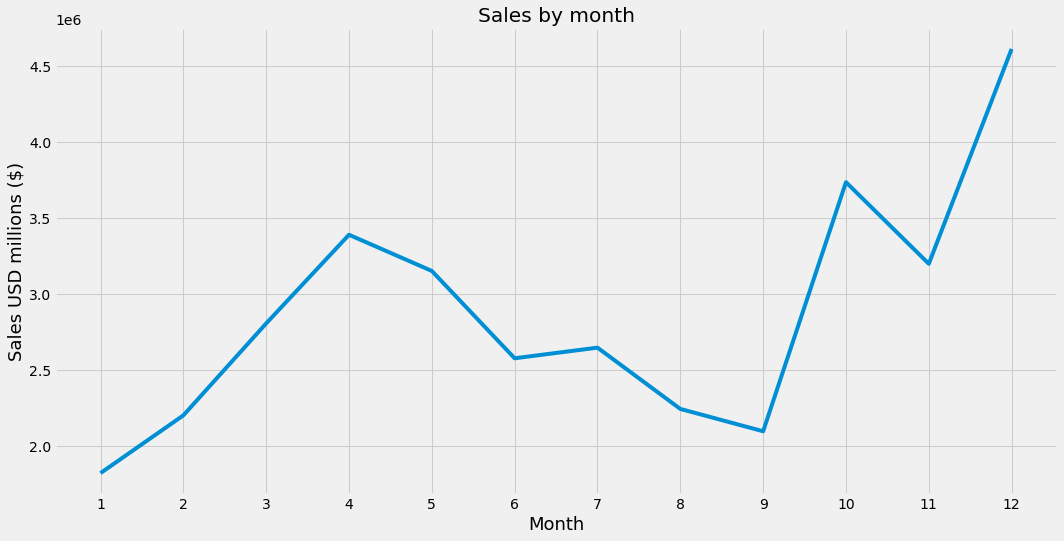

In [39]:
plt.figure(figsize=(16,8))
plt.title('Sales by month')
plt.plot(df_vis['Sales'])
plt.xticks(range(1,13))
plt.xlabel('Month', fontsize = 18)
plt.ylabel('Sales USD millions ($)', fontsize = 18)
plt.show()

Which city had the highest $ of sales?

In [56]:
df_vis_city = df.groupby('City').sum()
df_vis_city.head()

,Quantity Ordered,Price Each,Month,Sales
City,,,,
Atlanta GA,16602,2779908.20,104794,2795498.58
Austin TX,11153,1809873.61,69829,1819581.75
Boston MA,22528,3637409.77,141112,3661642.01
Dallas TX,16730,2752627.82,104620,2767975.40
Los Angeles CA,33289,5421435.23,208325,5452570.80


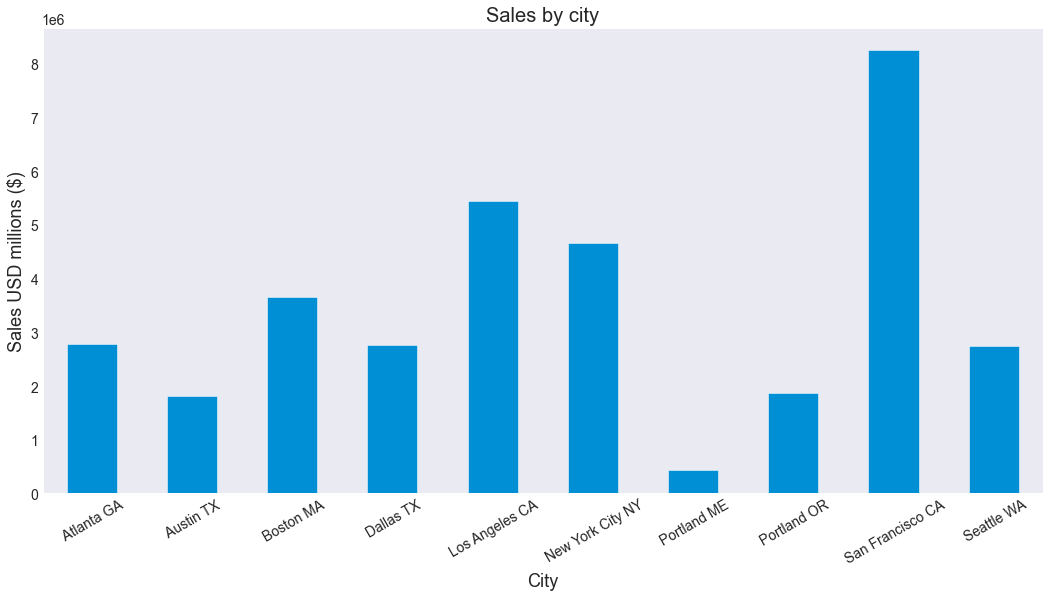

In [57]:
plt.figure(figsize=(16,8))
sns.set_style('dark')
plt.title('Sales by city')
df_vis_city['Sales'].plot(kind = 'bar') # or kind = 'barh' for horizontal bar chart
plt.xticks(rotation = 30, horizontalalignment = 'center')
plt.xlabel('City', fontsize = 18)
plt.ylabel('Sales USD millions ($)', fontsize = 18)
plt.show()

In [58]:
# Issue with doing the above: there might be > 1 city with the same name eg: Portland might be in different states
# Therefore I added the get_state function as well